In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare

%matplotlib inline

In [2]:
df = pd.read_csv('jeopardy.csv')

In [3]:
df.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona


In [4]:
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [5]:
df.rename(columns = lambda x: x.strip(), inplace = True)

In [6]:
df.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [7]:
df.dtypes

Show Number     int64
Air Date       object
Round          object
Category       object
Value          object
Question       object
Answer         object
dtype: object

In [8]:
def clean_qa(string):
    string = str(string)
    string = string.lower()
    punctuation = ['.', ',', '!', '?', ':', ';',
                   '(', ')','"',"'",'$']
    for p in punctuation:
        string = string.replace(p, '')
    string.replace('--', ' ')
    return string

In [9]:
df['clean_question'] = df['Question'].apply(clean_qa)
df['clean_answer'] = df['Answer'].apply(clean_qa)
df['clean_category'] = df['Category'].apply(clean_qa)

In [10]:
df['clean_question'][:3]

0    for the last 8 years of his life galileo was u...
1    no 2 1912 olympian football star at carlisle i...
2    the city of yuma in this state has a record av...
Name: clean_question, dtype: object

In [11]:
df['clean_answer'][:3]

0    copernicus
1    jim thorpe
2       arizona
Name: clean_answer, dtype: object

In [12]:
df['clean_category'][:3]

0                           history
1    espns top 10 all-time athletes
2          everybody talks about it
Name: clean_category, dtype: object

In [13]:
def clean_dollar(dollar):
    punctuation = ['.', ',', '!', '?', ':', ';',
                   '(', ')','"',"'",'$']
    for p in punctuation:
        dollar = dollar.replace(p, '')
    try:
        dollar = int(dollar)
    except ValueError:
        dollar = 0
    return dollar

In [14]:
df['clean_value'] = df['Value'].apply(clean_dollar)

In [15]:
df['clean_value'][:3]

0    200
1    200
2    200
Name: clean_value, dtype: int64

In [16]:
df['clean_date'] = pd.to_datetime(df['Air Date'])

In [17]:
clean_df = df[['clean_date',
               'clean_category',
               'clean_question',
               'clean_answer',
               'clean_value']]

In [18]:
del df

In [19]:
df = clean_df

In [20]:
df.rename(columns = lambda x: x.replace('clean_', ''), inplace = True)

In [21]:
df.head(3)

,date,category,question,answer,value
0,2004-12-31,history,for the last 8 years of his life galileo was u...,copernicus,200
1,2004-12-31,espns top 10 all-time athletes,no 2 1912 olympian football star at carlisle i...,jim thorpe,200
2,2004-12-31,everybody talks about it,the city of yuma in this state has a record av...,arizona,200


In [22]:
def get_match_count(row):
    
    # tokenize the answer and question
    split_answer = row['answer'].split(' ')
    split_question = row['question'].split(' ')
    
    # remove common stop words to keep results unbiased
    ### consider re-running the results with an expanded stop word list
    words = ['the', 'a', 'an']
    for w in words:
        if w in split_answer:
            split_answer.remove(w)
    
    
    # div/0 error handling later
    if len(split_answer) == 0:
        return 0
    
    # set, get, and return match count
    match_count = 0
    for a in split_answer:
        if a in split_question:
            match_count += 1
    
    return match_count / len(split_answer)

In [23]:
df['match_count'] = df.apply(get_match_count, axis = 1)

In [24]:
df.sort_values('match_count', ascending = False)[:5]

,date,category,question,answer,value,match_count
18578,2006-04-06,which tv show came first,saturday night live monday night football 60 m...,monday night football,800,1.0
2329,2004-07-23,bird hunting,the stars of the movie network include faye du...,a finch,200,1.0
18058,1998-09-22,put em in order,revolver sgt peppers lonely hearts club band ...,meet the beatles revolver sgt peppers lonely h...,200,1.0
11428,1998-03-30,the four seasons,the fall guy in the teapot dome scandal albert...,the fall,100,1.0
18584,2006-04-06,which tv show came first,csi ny csi miami ncis,csi miami,1000,1.0


In [25]:
df['match_count'].mean()

0.044496898088327658

**Meaning?**

The answer is found in the question about 4-5% of the time. Relying on this would probably not be the best strategy as you _might_ get one out of every 20 or so questions right.

In [26]:
df.sort_values('date', ascending = True, inplace = False)

,date,category,question,answer,value,match_count
19325,1984-09-21,us presidents,adventurous 26th president he was 1st to ride ...,theodore roosevelt,0,0.000000
19301,1984-09-21,labor unions,notorious labor leader missing since 75,jimmy hoffa,200,0.000000
19302,1984-09-21,1789,washington proclaimed nov 26 1789 this first n...,thanksgiving,200,0.000000
19303,1984-09-21,tourist traps,both ferde grofe & the colorado river dug this...,the grand canyon,200,0.000000
19304,1984-09-21,literature,depending on the book he could be a jones a sa...,tom,200,0.000000
19305,1984-09-21,homonyms,hindu hierarchy or a plays actors,a caste cast,200,0.000000
19306,1984-09-21,tv trivia,last season this series mourned the loss of sg...,hill street blues,200,0.000000
19307,1984-09-21,1789,why april 28th was a bad day for capt bligh,the day of the mutiny on the bounty,400,0.142857
19308,1984-09-21,tourist traps,seaside resort that has a monopoly on east coa...,atlantic city new jersey,400,0.000000
19309,1984-09-21,literature,he wrote the 3 musketeers his son wrote camille,alexandre dumas,400,0.000000


In [27]:
terms_used = set()
question_word_overlap = []

for index, row in df.iterrows():
    split_question = row['question'].split()
    split_question = [s for s in split_question if len(s) >= 6]
    match_count = 0
    for s in split_question:
        if s in terms_used:
            match_count += 1
        else:
            terms_used.add(s)
    if len(split_question) > 0:
        match_count /= len(split_question)
    question_word_overlap.append(match_count)

In [28]:
df['question_word_overlap'] = question_word_overlap

In [29]:
df['question_word_overlap'].mean()

0.69031988018405266

In [30]:
overlap_progression = []
hundred_overlap = []

for i, row in df.iterrows():
    # there are 30 questions/game (if timer doesn't run out)
    if len(hundred_overlap) < 31:
        hundred_overlap.append(row['question_word_overlap'])
    else:
        overlap_progression.append(np.array(hundred_overlap).mean())
        hundred_overlap = []

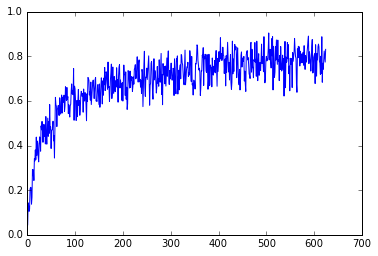

In [31]:
steps = np.linspace(1, len(overlap_progression), len(overlap_progression))

plt.plot(steps, overlap_progression);

**Obviously...**

words are repeated over time, with the most recent episodes having an average of about 80% of the words seen previously.

It is somewhat surprising to see the variance in the most recent episodes, vascilating in a window of around 20%. This would probably smaller if we had a larger dataset.

***Would be interesting to look at collocations, a better indicator of topic / question repeating, to see if there is any trend there.***

In [32]:
def high_or_low_value(row):
    if row['value'] > 800: value = 1
    else: value = 0
    return value

In [33]:
df['high_or_low_value'] = df.apply(high_or_low_value, axis = 1)

In [34]:
def high_low_count(word):
    low_count = 0
    high_count = 0
    for i, row in df.iterrows():
        tokens = row['question'].split()
        if word in tokens:
            if row['high_or_low_value'] == 1:
                high_count += 1
            else:
                low_count += 1
    return high_count, low_count

In [35]:
# create list (while cleaning it up a bit) using terms randomly
# selected from terms used set)
from random import sample

terms_used_list = [t for t
                   in list(terms_used)
                   if not t.startswith('href')
                       and not t.startswith('target')
                       and not '<' in t]

### select quantity of terms for chi square analysis from terms used list
sample_size = 10000
term_sample = sample(terms_used_list, sample_size)

In [36]:
term_sample

['rocker',
 'screeno',
 'earthworms',
 'provided',
 'railroad',
 'melita',
 'ballers',
 'ways--for',
 'crisscross',
 'ohlsson',
 'savonius',
 'cardiologist',
 'illegally',
 'nosing',
 'paints',
 'dunfermline',
 'prosecution',
 'mountain',
 'fieldwork',
 'superb',
 'portnoys',
 'structural',
 'exhale',
 'invasions',
 'neutrons',
 'rheingold',
 'normal',
 'batson',
 '1869-70',
 'aftertaste',
 'shuster',
 'funnel',
 'bridgestone',
 'honeydews',
 'ikaria',
 'cretaceous',
 '1955-1966',
 'steamin',
 'patrolled',
 'highest',
 'visual',
 'potable-named',
 'chalkboard',
 'belmopan',
 'mordred',
 'anshan',
 'inhabitant',
 'dunkin',
 'wealthiest',
 'camelias',
 'bryans',
 'imports',
 'stockholm',
 'potbellied',
 'freemans',
 'mefistofele',
 'agatha',
 'louisville',
 'macgraw',
 'produced',
 'impairments',
 'baptism',
 'madrilenos',
 'red-haired',
 'winslet',
 'krafts',
 'florences',
 'chernobyl',
 'continued',
 'another',
 'renting',
 'italian-themed',
 'flared-below-the-knee',
 'acrophobia',
 'w

In [37]:
# loop through and get high/low count for each term in sample
### NOTE: this takes a long time, set progress print as needed
observed_expected = []
counter = 0

### if taking a long time, set interval for debugging
progress_print_interval = 200

for term in term_sample:
    observed_expected.append(high_low_count(term))
    counter += 1
    if counter % progress_print_interval == 0: print(counter)

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000


In [38]:
# get counts of high and low values for chi square analysis
high_value_count = df['high_or_low_value'].sum()
low_value_count = len(df.index) - high_value_count

In [40]:
# chi square analysis
chi_squared = []
total_obs = len(df.index)

for obs in observed_expected:
    
    # find the expected values
    total = sum(obs)
    total_prop = total / total_obs
    exp_high = total_prop * high_value_count
    exp_low = total_prop * low_value_count
    
    # build out arrays for obs/exp and run through scikit chisquare
    obs_arr = np.array([obs[0], obs[1]])
    exp_arr = np.array([exp_high, exp_low])
    chi_squared.append(chisquare(obs_arr, exp_arr))

In [45]:
# create a list of diictionaries from chi square output for easy df conversion
analysis_list = []

for i in range(len(term_sample)):
    analysis_row = {'term': term_sample[i],
                    'chisq': chi_squared[i][0],
                    'p value': chi_squared[i][1]}
    analysis_list.append(analysis_row)

# create dataframe with each of the terms and their respective values
term_value = pd.DataFrame(analysis_list)

In [50]:
term_value[term_value['p value'] < 0.01].sort_values('chisq', ascending = False)

,chisq,p value,term
2840,30.705096,3.003752e-08,french
6291,16.139880,5.883209e-05,reports
6274,13.635381,2.219628e-04,italian
3409,13.429676,2.476749e-04,pulitzer
9117,12.719123,3.619354e-04,liquid
5917,11.997980,5.325823e-04,example
3103,10.439669,1.233374e-03,hormone
6120,9.954357,1.604691e-03,relative
8310,9.951168,1.607473e-03,travis
5107,9.951168,1.607473e-03,expatriate
